In [1]:
# Import the required packages to perform clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
penguins = pd.read_csv('./datasets/penguins.csv')
print(penguins.head())
print(penguins.info())

# Drop the rows with missing values
penguins.dropna(inplace=True)
print(penguins.info())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
In

In [2]:
# Perform preprocessing steps on the data to convert categorical variables to numerical ones using dummy encoding
penguins= pd.get_dummies(penguins, dtype='int', drop_first=True)
print(penguins.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   sex_FEMALE  sex_MALE  
0           0         1  
1           1         0  
2           1         0  
4           1         0  
5           0         1  


In [3]:
# Standardize the features before clustering to improve accuracy
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins)
penguins_preprocessed = pd.DataFrame(penguins_scaled, columns=penguins.columns)
print(penguins_preprocessed.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.897723         0.777263          -0.126893    -0.572233   
1         -0.824265         0.117037          -0.107872    -0.509923   
2         -0.677349         0.421757          -0.073633    -1.195338   
3         -1.338472         1.081983          -0.081242    -0.946096   
4         -0.860994         1.742210          -0.092655    -0.696854   

   sex_FEMALE  sex_MALE  
0   -0.985184  0.991085  
1    1.015038 -1.008996  
2    1.015038 -1.008996  
3    1.015038 -1.008996  
4   -0.985184  0.991085  


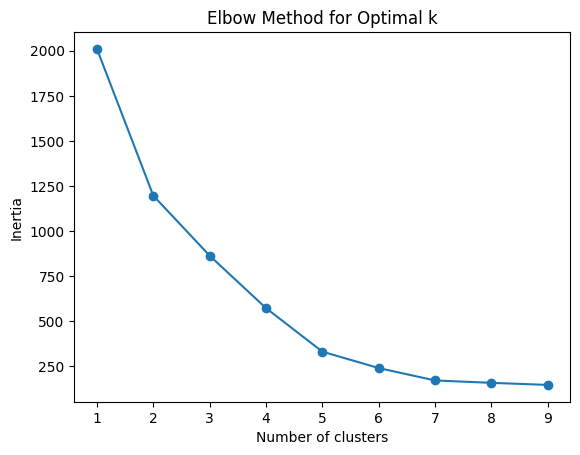

[2009.9999999999998, 1196.1858365204776, 863.043353236863, 572.279764113207, 330.6640709590563, 239.76132171075332, 171.03508104279064, 157.8243082235395, 146.3136605653287]


In [4]:
# Identify the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

print(inertia)

# From the elbow plot, choose the optimal number of clusters (e.g., k=3)
optimal_k = 5

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   sex_FEMALE  sex_MALE  Cluster  
0           0         1        3  
1           1         0        0  
2           1         0        0  
4           1         0        0  
5           0         1        3  


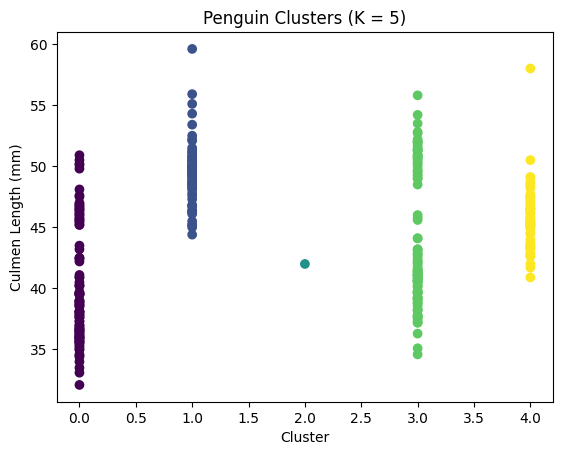

In [5]:
# Run KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(penguins_preprocessed)
penguins['Cluster'] = kmeans.labels_
print(penguins.head())

# Visualize the clustering results using a scatter plot of culmen_length_mm
plt.scatter(penguins['Cluster'], penguins['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Culmen Length (mm)')
plt.title(f'Penguin Clusters (K = {optimal_k})')
plt.show()

In [6]:
# Store result in Dataframe with cluster labels
cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'Cluster']
stat_penguins = penguins[cols].groupby('Cluster').mean()
print(stat_penguins)

# There is a need to improve the clustering because there is lone points in some clusters
# that could be outliers or misclassified points. Further analysis and refinement of the clustering
# process may be necessary to achieve better separation and more meaningful clusters.

         culmen_length_mm  culmen_depth_mm  flipper_length_mm
Cluster                                                      
0               40.050000        17.609434         189.122642
1               49.473770        15.718033         221.540984
2               42.000000        20.200000        5000.000000
3               43.791589        19.129907         191.710280
4               45.753333        14.321667         212.250000
